In [27]:
import pandas as pd
import json
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt 
from scipy.linalg import svd
import numpy as np
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

%matplotlib inline

In [28]:
with open('watch-later.json','r') as fout:
       likes = json.load(fout)
type(likes)

list

In [29]:
likes[0]

{'contentDetails': {'videoId': 'DQFacKBoZ7U',
  'videoPublishedAt': '2011-09-08T00:45:19.000Z'},
 'etag': '"wdgS91PsEbtTfi20GmzFuZzYg2s/jHx30iuuduzdKydu2ciMngPyEIw"',
 'id': 'V0xuMXpfYjA3QnQ2TzJkWUdoTXZlY2JRLkNBQ0RENDY2QjNFRDE1NjU=',
 'kind': 'youtube#playlistItem',
 'snippet': {'channelId': 'UCn1z_b07Bt6O2dYGhMvecbQ',
  'channelTitle': 'Nikhil Baad',
  'description': 'http://www.SpeedTrainingChallenge.com Take the AthleticQuickness.com Speed Training Challenge! It’s simple, effective and helps athletes of all ages run faster! \n\nAll you have to do is first, time yourself in the 40m dash, 60m dash, 100m or 200m sprints. Then, perform the one simple, 3-minute speed training exercise for the hip flexor muscles shown in this video three times a week for just two weeks.  That’s only six speed training sessions lasting three minutes each for a grand total of just 18 minutes of exercise! \n\nWhen you are done with that, go back and time yourself again in the same sprints or races and see ho

In [30]:
titles = [v['snippet']['title'] for v in likes]
descriptions = [v['snippet']['description'] for v in likes]

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
from wordcloud import WordCloud

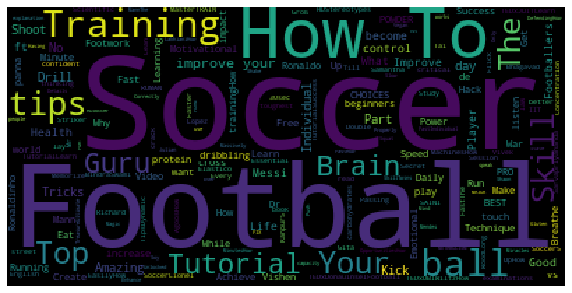

In [33]:
wc = WordCloud().generate("".join(titles))
plt.figure(figsize=(10,12))
plt.imshow(wc)
_=plt.axis('off')

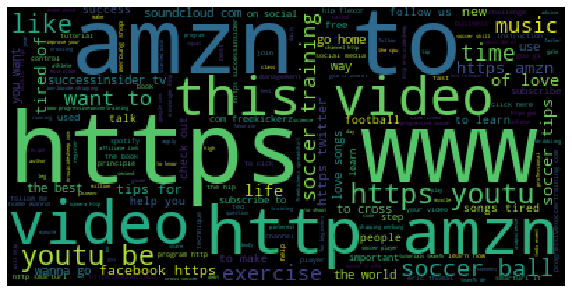

In [34]:
stopwords = ['http', 'www', 'com', 'facebook', 'youtube' , 'bit' , 'ly' , 'goo' , 'watch' , 'suggest' , 'twitter' , 'instagram' ]
stopwords +=  list(ENGLISH_STOP_WORDS)
desc = ' '.join(descriptions).lower()

wc= WordCloud(stopwords=stopwords, normalize_plurals=True).generate(desc)
plt.figure(figsize=(10,12))
plt.imshow(wc)
_=plt.axis('off')

In [35]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages (0.23.1)
Note: you may need to restart the kernel to use updated packages.


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vect = TfidfVectorizer(stop_words=stopwords)


X = vect.fit_transform(descriptions)

In [37]:
X.shape

(98, 3737)

In [38]:
U, S, V = svd(X.todense(), full_matrices=False)

In [39]:
num_top_words = 5
vocab = vect.get_feature_names()

def show_topics(a , n_words=5):
    top_words = lambda t: [vocab[i] for i in np.argsort(t) [:-n_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [40]:
show_topics(V[:20])

['commentary ps4 wars hd60 60fps',
 'soccer program workout gurumann fitness',
 'soccer training ball tips cross',
 'soccer amzn fitness guru mann',
 'https mrsuicidesheep goluremi waysons soundcloud',
 'mrsuicidesheep https tedx soundcloud spotify',
 'thomas eric video use life',
 'exercise mrsuicidesheep good love squat',
 'training https tobuofficial itro waysons',
 'exercise thomas eric michaellewiscunningham training',
 'love tired life wanna home',
 'asapscience study whalewatchmeplz mitchellmoffit memorize',
 'lesson ed richard wood thomas',
 'code principle good success amzn',
 'protein meal recipe menu lean',
 'tube follow sweetspotsquad guy success',
 'protein brain recipe menu meal',
 'code management machine structure asapscience',
 'brain goluremi training state talk',
 'goluremi michaellewiscunningham skilltwins ball waysons']

In [41]:
from sklearn.decomposition import TruncatedSVD

In [42]:
tsne = TruncatedSVD(n_components=2)
x_red = tsne.fit_transform(X.todense())

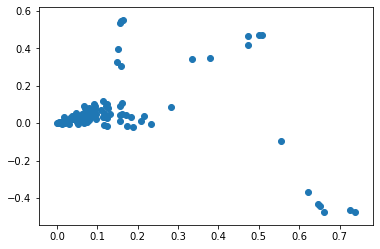

In [43]:
plt.scatter(*x_red.T)

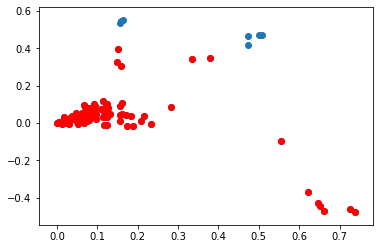

In [46]:
outliers = np.arange(x_red.shape[0])[x_red[:, 1] < 0.4]
plt.scatter(*x_red.T)
plt.scatter(*x_red[outliers, :].T, c="r")

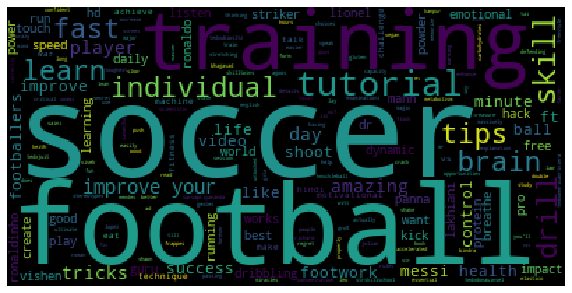

In [47]:
outliers = [titles[i] for i in outliers]
wc = WordCloud(stopwords = stopwords , normalize_plurals = True).generate(' '.join(outliers).lower())
plt.figure(figsize=(10,12))
plt.imshow(wc)
_=plt.axis('off')